# Neural Networks in Keras with GridSearchCV 

## By: Rhea Sethi

# 1.) Preprocess your data into scaled input variables and an output variable


In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/CLV.csv")

In [ ]:
df

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,23405.987980,71941,2,198.234764,18,0,1,1,1,0,0,0,0,1,0,1,0
9130,9130,3096.511217,21604,1,379.200000,14,0,1,0,1,0,0,0,1,0,1,0,0
9131,9131,8163.890428,0,2,790.784983,9,0,1,1,0,0,0,1,1,0,0,0,1
9132,9132,7524.442436,21941,3,691.200000,34,1,0,1,1,0,0,0,0,1,0,1,0


In [ ]:
#Defining input and output variables

X = df.drop(["Unnamed: 0","Customer Lifetime Value"], axis =1 )
y = df[['Customer Lifetime Value']]

In [ ]:
#Splitting the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#Scaling the data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
#Running GridSearch CV on 18 combinations of hyperparameters

clf = MLPRegressor()

params = {
    "hidden_layer_sizes": [(10,), (20,5,), (50,10,)], 
    "activation" : ['relu','logistic', 'tanh'],
    "alpha" : [0.0001, 0.001]
}

In [ ]:
#Disabling warnings

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Fitting the grid

grid = GridSearchCV(clf, params, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'logistic', 'tanh'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(10,), (20, 5), (50, 10)]})

In [ ]:
print(grid.best_params_)

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 5)}


The optimal activation function for the neural network is Hyperbolic Tangent, the optimal hidden layer size is (20,5) and the optimal value for alpha is 0.0001.

# 3.) Train a model with the optimal solution from GridSearch

In [ ]:
#Defining the model using the optimal solution from GridSearchCV

regressor = MLPRegressor(**grid.best_params_)

In [ ]:
regressor.fit(X_train, y_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=(20, 5))

# 4.) What are the in-sample and out of sample MSEs

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
#Training set predictions
y_pred_in = regressor.predict(X_train)

#Testing set predictions
y_pred = regressor.predict(X_test)

In [ ]:
#In-sample MSE
in_mse = mean_squared_error(y_train, y_pred_in)

in_mse

0.36875119760983743

In [ ]:
#Out-of-sample MSE
out_mse = mean_squared_error(y_test, y_pred)

out_mse

0.42932220097516555

The in-sample MSE is ~0.37 and the out-of-sample MSE is ~0.43, slightly higher than the formal as expected.

# 5.) Build a Keras with the architecture defined by GridSearchCV

In [ ]:
import keras.models
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#Creating the architecture

model = Sequential()
model.add(Dense(20, input_dim = X_train.shape[1], activation = "tanh"))
model.add(Dense(5, activation = "tanh"))
model.add(Dense(1, activation = 'linear'))

In [ ]:
#Training the model

model.compile(loss = 'mse', optimizer = Adam(lr=0.0001))
model.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 1.1205
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 1.0684
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 1.0403
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 1.0206
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 1.0055
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.9935
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.9839
Epoch 8/100
200/200 [==============================] - 0s 2ms/step - loss: 0.9756
Epoch 9/100
200/200 [==============================] - 0s 2ms/step - loss: 0.9683
Epoch 10/100
200/200 [==============================] - 0s 2ms/step - loss: 0.9618
Epoch 11/100
200/200 [==============================] - 0s 2ms/step - loss: 0.9558
Epoch 12/100
200/200 [==============================] - 0s 2ms/step - loss: 0.9504
Epoch 13/100


In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 20)                340       
                                                                 
 dense_17 (Dense)            (None, 5)                 105       
                                                                 
 dense_18 (Dense)            (None, 1)                 6         
                                                                 
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [ ]:
#Saving the model

model.save("my_model.h5")

In [ ]:
#Loading the model

mod = keras.models.load_model('my_model.h5')

In [ ]:
from tensorflow.keras.utils import plot_model

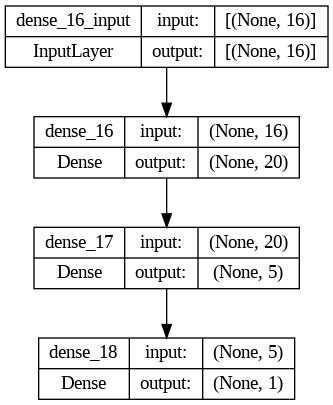

In [ ]:
#Visualization using plot_model

plot_model(model, show_shapes = True)

In [ ]:
#Visualization using ann_viz

pip install ann_visualizer
from ann_visualizer.visualize import ann_viz 

In [ ]:
ann_viz(model, title = "CLV Neural Network", filename = "/content/my_model.h5")

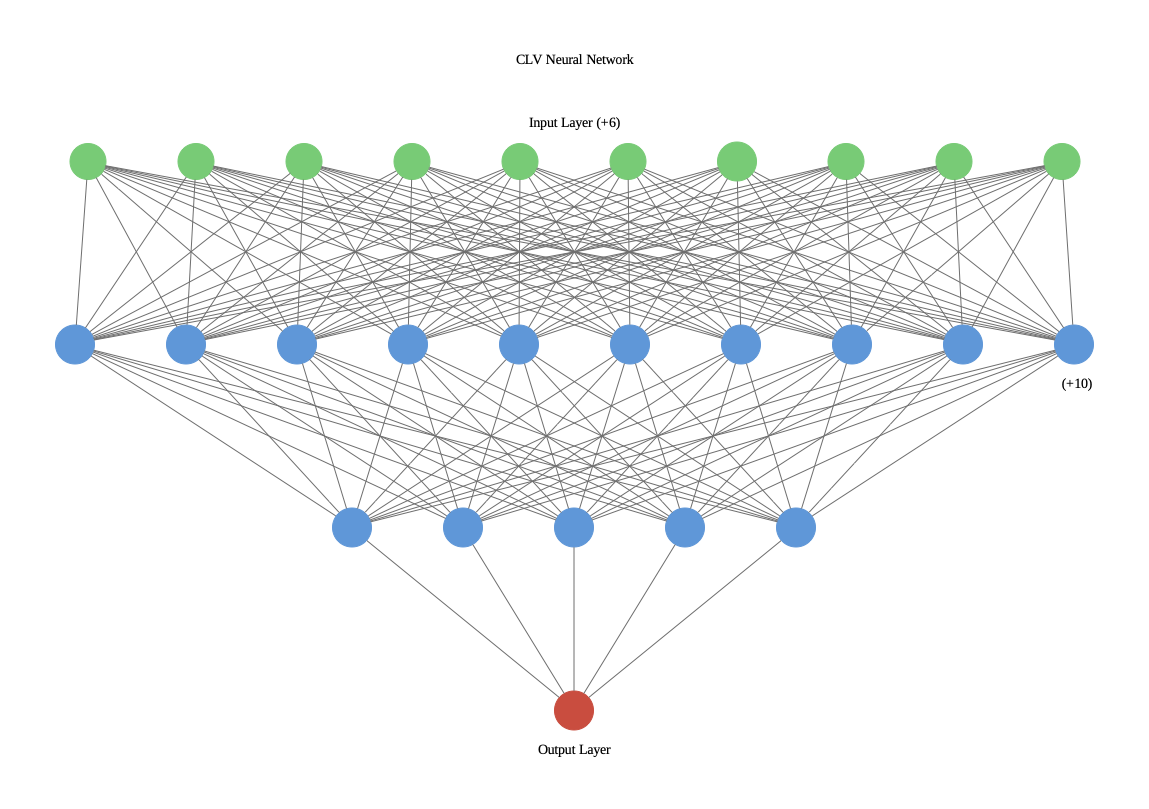

In [ ]:
from IPython.display import Image
Image('/content/my_model.h5.png')